In [1]:
import numpy as np
from matplotlib import pyplot as plt
import agents_enviroments
np.random.seed(12314)

In [2]:
bays = [agents_enviroments.Bay() for _ in range(6)]
isobays = [agents_enviroments.IsolationBay() for _ in range(6)]
bays += isobays
params = agents_enviroments.Parameters(C= 0.3 ,V=1, m=0.9, k=0.4,treatment_prob=0.9,isolation_prob=0.01)
ward = agents_enviroments.Ward(bays,params=params)


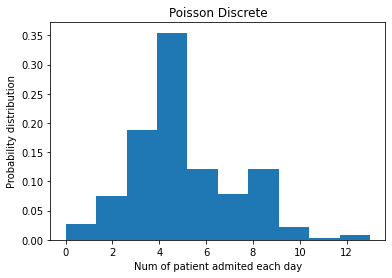

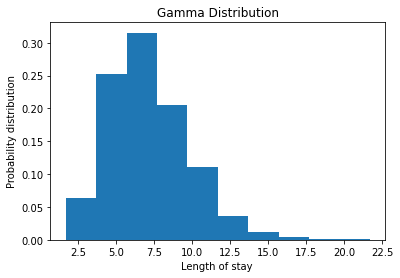

In [3]:
patient_generator = agents_enviroments.PatientGenerator()
patient_generator.set_var(poisson_lambda=5,gamma_k=7,gamma_scale=1)
patient_sequence = patient_generator.generate_sequence(colonized_prob=0.02,time=265)
patient_generator.show_admit()
patient_generator.show_length_stay()

In [4]:
from agents_enviroments import History
from agents_enviroments.movement_strategy import IsolateInfectedStrategyy
history = History() 
for patients in patient_sequence:
    ward.remove_patients()
    ward.screen_patients()
    ward.get_patient_results()
    ward.admit_patients(patients=patients)
    ward.generate_transmission()
    ward.generate_treatment()
    ward.move_patients(IsolateInfectedStrategyy())
    history.add_from_dict(ward.history_dict())
    ward.forward_time()
    

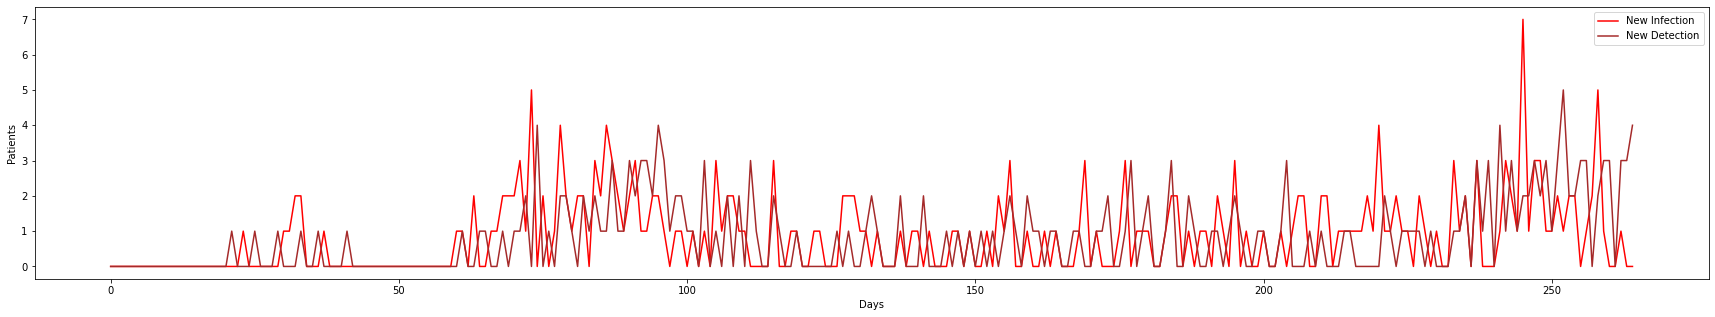

In [5]:
plt.figure(figsize=(30,5))
# plt.plot(history.time,history.screened)
plt.plot(history.time,history.new_infections, color='red')
plt.plot(history.time,history.new_detected, color='brown')
plt.legend(["New Infection","New Detection"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

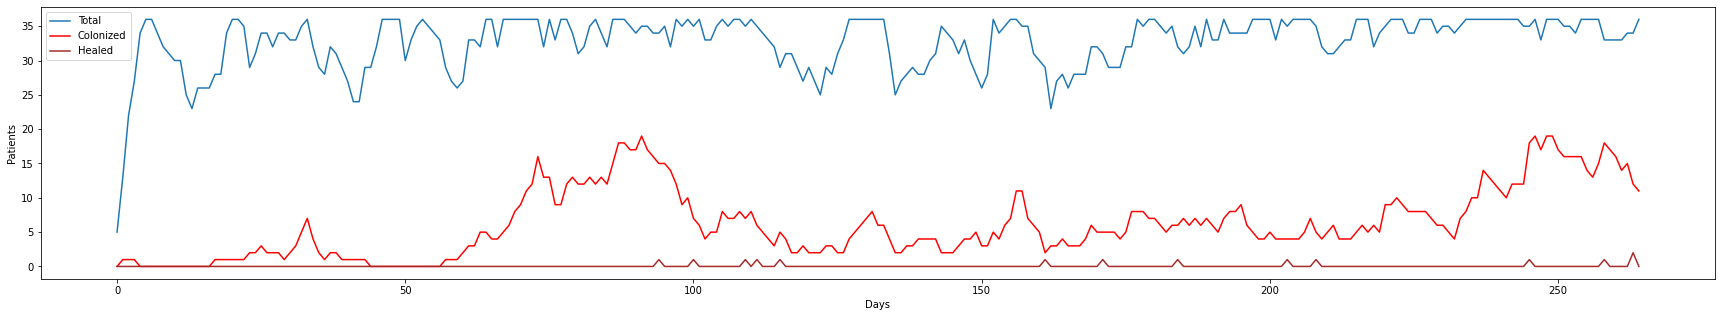

In [6]:
plt.figure(figsize=(30,5))
plt.plot(history.time,history.total)
plt.plot(history.time,history.colonized, color='red')
plt.plot(history.time,history.healed, color='brown')
plt.legend(["Total","Colonized","Healed"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

In [7]:
secondary_cases = sum(history.new_infections)
secondary_cases

226.0

In [8]:
len(patient_generator.primary_cases)

25